#**LOAD DATA**#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


#**EDA**#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [ ]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,141.000000,141.000000,401.000000,401.000000,400.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,152.382979,92.524823,37.900249,43.039900,341.250000
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,21.712952,11.555198,5.729313,5.656713,309.540953
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,110.000000,60.000000,26.000000,30.000000,5.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,138.000000,84.000000,33.000000,39.000000,90.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,149.000000,92.000000,37.000000,42.000000,240.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,161.000000,100.000000,41.000000,46.000000,517.500000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,238.000000,124.000000,56.000000,64.000000,1560.000000


In [ ]:
df.isna().sum()

,0
id,0
chol,1
stab.glu,0
hdl,1
ratio,1
glyhb,13
location,0
age,0
gender,0
height,5


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include='object')

,location,gender,frame
count,403,403,391
unique,2,2,3
top,Louisa,female,medium
freq,203,234,184


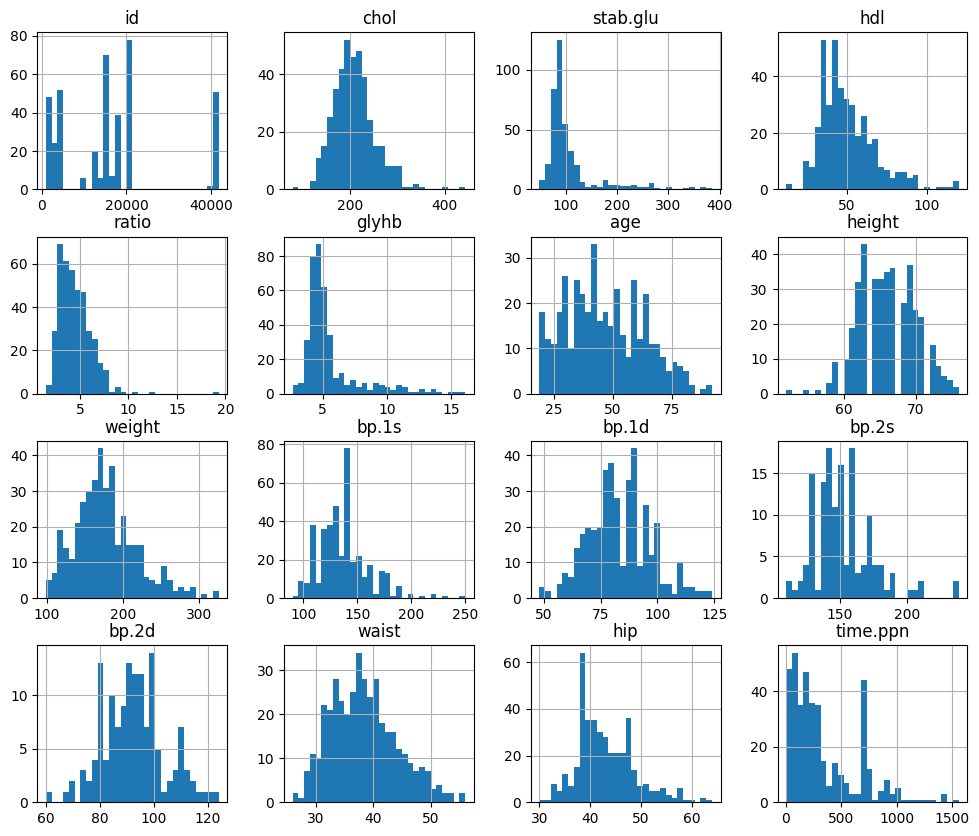

In [ ]:
df.hist(figsize=(12, 10), bins=30)
plt.show()


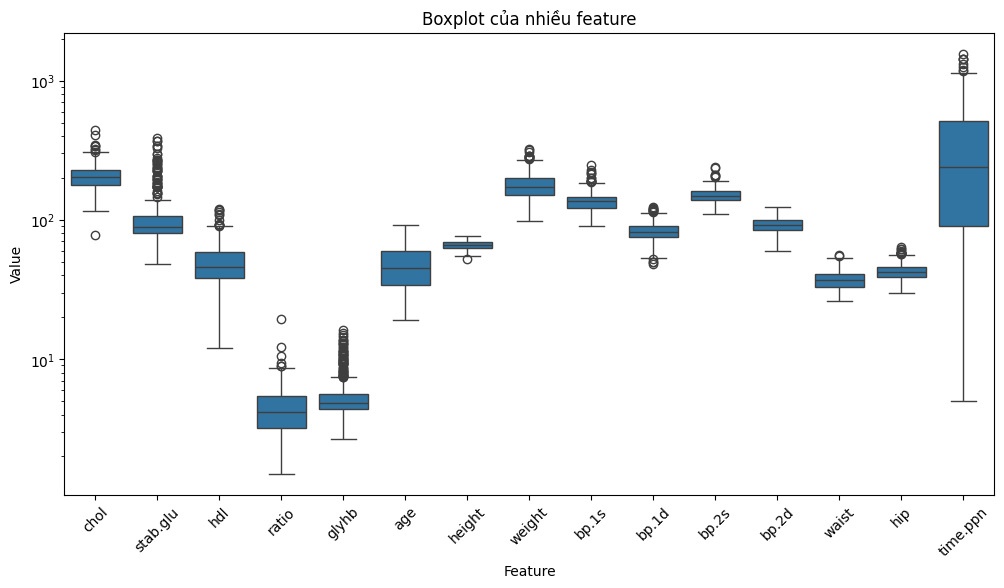

In [ ]:
numeric_col = df.select_dtypes('number').columns.to_list()
numeric_col.remove('id')
df_melted = df[numeric_col].melt(var_name = 'Feature', value_name = 'Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x="Feature", y="Value", data=df_melted)
plt.xticks(rotation=45)  # Xoay nhãn cột cho dễ nhìn
plt.yscale('log')
plt.title("Boxplot của nhiều feature")
plt.show()

<Axes: xlabel='waist'>

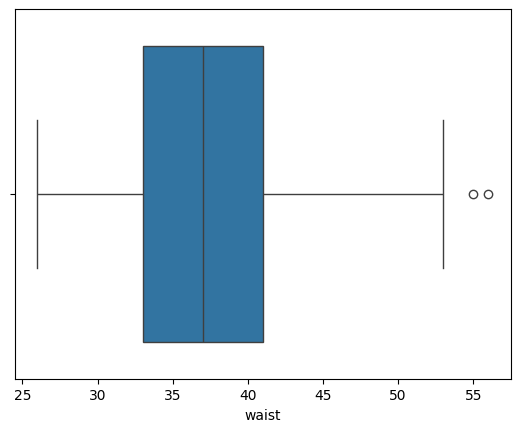

In [ ]:
sns.boxplot(x=df['waist'])

#**DATA CLEANING**#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [ ]:
df.isna().sum()

,0
id,0
chol,1
stab.glu,0
hdl,1
ratio,1
glyhb,13
location,0
age,0
gender,0
height,5


In [ ]:
df.drop(['bp.2s','bp.2d'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  waist     401 non-null    float64
 15  hip       401 non-null    float64
 16  time.ppn  400 non-null    float64
dtypes: float64(11), int64(3), object(3)
memory usage: 53.7+ KB


In [ ]:
numeric_col_na = ['chol','hdl','ratio','glyhb','height','weight','bp.1s','bp.1d','waist','hip','time.ppn']
def fill_missing_value_numeric(col_name):
  for col in col_name:
    df[col] = df[col].fillna(df[col].mean().round( ))
  return df
fill_missing_value_numeric(numeric_col_na)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      403 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       403 non-null    float64
 4   ratio     403 non-null    float64
 5   glyhb     403 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    403 non-null    float64
 10  weight    403 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     403 non-null    float64
 13  bp.1d     403 non-null    float64
 14  waist     403 non-null    float64
 15  hip       403 non-null    float64
 16  time.ppn  403 non-null    float64
dtypes: float64(11), int64(3), object(3)
memory usage: 53.7+ KB


In [ ]:
df['frame'].value_counts()

,count
frame,
medium,184
small,104
large,103


In [ ]:
df['frame'] = df['frame'].fillna(df['frame'].mode()[0])

In [ ]:
df['frame'].value_counts()

,count
frame,
medium,196
small,104
large,103


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      403 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       403 non-null    float64
 4   ratio     403 non-null    float64
 5   glyhb     403 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    403 non-null    float64
 10  weight    403 non-null    float64
 11  frame     403 non-null    object 
 12  bp.1s     403 non-null    float64
 13  bp.1d     403 non-null    float64
 14  waist     403 non-null    float64
 15  hip       403 non-null    float64
 16  time.ppn  403 non-null    float64
dtypes: float64(11), int64(3), object(3)
memory usage: 53.7+ KB


In [ ]:
# df.to_excel('cleaned_data.xlsx', index=False)
# from google.colab import files
# files.download('cleaned_data.xlsx')

In [ ]:
# Add BMI column from weight and height
df['BMI'] = (((df['weight']) * 0.4536) / ((df['height'] * 0.0254)**2)).round(1)

In [ ]:
# Add outcome column from glyhb, 0 for Normal and 1 for Diabetes
df['outcome'] = np.where(df['glyhb'] >= 6.5, 1, 0)

In [ ]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,BMI,outcome
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,22.1,0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,37.4,0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,48.4,0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,18.6,0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,27.8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      403 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       403 non-null    float64
 4   ratio     403 non-null    float64
 5   glyhb     403 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    403 non-null    float64
 10  weight    403 non-null    float64
 11  frame     403 non-null    object 
 12  bp.1s     403 non-null    float64
 13  bp.1d     403 non-null    float64
 14  waist     403 non-null    float64
 15  hip       403 non-null    float64
 16  time.ppn  403 non-null    float64
 17  BMI       403 non-null    float64
 18  outcome   403 non-null    int64  
dtypes: float64(12), int64(4), object(3)
memory usage: 59.9+ KB


#**EDA after cleaning data**

In [ ]:
# Check correlation
# Continous numeric feature
continuous_numeric = ['chol','stab.glu','hdl','ratio','glyhb','age','height','weight','bp.1s','bp.1d','waist','hip','time.ppn','BMI']

from scipy.stats import pointbiserialr

for col in continuous_numeric:
    corr, p_value = pointbiserialr(df[col], df['outcome'])
    print(f"Correlation between {col} and Outcome: {corr:.4f}, p-value: {p_value:.4f}")

Correlation between chol and Outcome: 0.2074, p-value: 0.0000
Correlation between stab.glu and Outcome: 0.6859, p-value: 0.0000
Correlation between hdl and Outcome: -0.1261, p-value: 0.0113
Correlation between ratio and Outcome: 0.2830, p-value: 0.0000
Correlation between glyhb and Outcome: 0.8521, p-value: 0.0000
Correlation between age and Outcome: 0.3117, p-value: 0.0000
Correlation between height and Outcome: 0.0134, p-value: 0.7890
Correlation between weight and Outcome: 0.1491, p-value: 0.0027
Correlation between bp.1s and Outcome: 0.2194, p-value: 0.0000
Correlation between bp.1d and Outcome: 0.0467, p-value: 0.3498
Correlation between waist and Outcome: 0.2204, p-value: 0.0000
Correlation between hip and Outcome: 0.1358, p-value: 0.0063
Correlation between time.ppn and Outcome: 0.0300, p-value: 0.5484
Correlation between BMI and Outcome: 0.1358, p-value: 0.0063


In [ ]:
# Categorical numeric feature
categorical_numeric = ['location','gender','frame']

from scipy.stats import chi2_contingency

for col in categorical_numeric:
    contingency_table = pd.crosstab(df[col], df['outcome'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {col} and Outcome: p-value = {p_value:.4f}")

Chi-square test between location and Outcome: p-value = 0.9477
Chi-square test between gender and Outcome: p-value = 0.7332
Chi-square test between frame and Outcome: p-value = 0.0047


#**Build Machine Learning model**#

In [ ]:
object_col = ['location','gender','frame']
df_encoded = pd.get_dummies(df, columns= object_col, dtype = 'int', drop_first= True)
df_encoded.drop('id', axis=1, inplace=True)

In [ ]:
a = df_encoded['outcome']
df_encoded.drop('outcome', axis=1, inplace = True)

In [ ]:
df_final = pd.concat([df_encoded, a], axis=1)

In [ ]:
df_final.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip,time.ppn,BMI,location_Louisa,gender_male,frame_medium,frame_small,outcome
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0,720.0,22.1,0,0,1,0,0
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,46.0,48.0,360.0,37.4,0,0,0,0,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,49.0,57.0,180.0,48.4,0,0,0,0,0
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,33.0,38.0,480.0,18.6,0,1,0,0,0
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,44.0,41.0,300.0,27.8,0,1,1,0,1


In [ ]:
df_final['outcome'].value_counts()

,count
outcome,
0,338
1,65


In [ ]:
df_final.drop('glyhb', axis=1, inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   chol             403 non-null    float64
 1   stab.glu         403 non-null    int64  
 2   hdl              403 non-null    float64
 3   ratio            403 non-null    float64
 4   age              403 non-null    int64  
 5   height           403 non-null    float64
 6   weight           403 non-null    float64
 7   bp.1s            403 non-null    float64
 8   bp.1d            403 non-null    float64
 9   waist            403 non-null    float64
 10  hip              403 non-null    float64
 11  time.ppn         403 non-null    float64
 12  BMI              403 non-null    float64
 13  location_Louisa  403 non-null    int64  
 14  gender_male      403 non-null    int64  
 15  frame_medium     403 non-null    int64  
 16  frame_small      403 non-null    int64  
 17  outcome         

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#**Without handling imbalance**#

In [ ]:
df_original = df_final.copy()

In [ ]:
X = df_original.drop('outcome', axis=1)
y = df_original['outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [ ]:
model_1 = RandomForestClassifier(n_jobs= -1, random_state=42)
model_1.fit(X_train, y_train)
Y_prob_1 = model_1.predict_proba(X_test)[:,1]
threshold = 0.3
Y_pred_1 = (Y_prob_1 >= threshold).astype(int)
print(classification_report(y_test, Y_pred_1, target_names=['Normal', 'Diabetes']))

              precision    recall  f1-score   support

      Normal       0.93      0.95      0.94        99
    Diabetes       0.75      0.68      0.71        22

    accuracy                           0.90       121
   macro avg       0.84      0.82      0.83       121
weighted avg       0.90      0.90      0.90       121



Text(50.722222222222214, 0.5, 'True label')

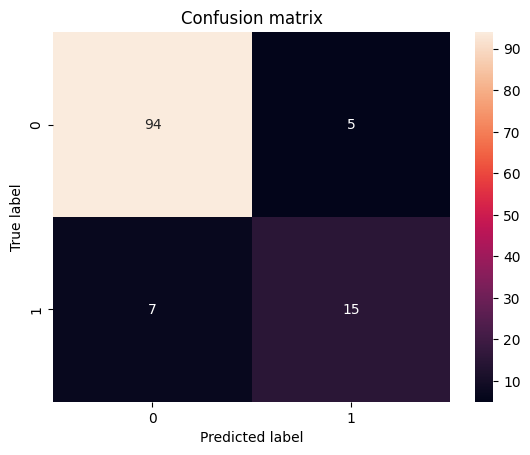

In [ ]:
# Draw confusion matrix for Random Forest model
cm = confusion_matrix(y_test, Y_pred_1)
# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')

# Customize the plot labels and title
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
model_2 = XGBClassifier()
model_2.fit(X_train, y_train)
Y_prob_2 = model_2.predict_proba(X_test)[:,1]
threshold = 0.45
Y_pred_2 = (Y_prob_2 >= threshold).astype(int)
print(classification_report(y_test, Y_pred_2, target_names=['Normal', 'Diabetes']))

              precision    recall  f1-score   support

      Normal       0.93      0.95      0.94        99
    Diabetes       0.75      0.68      0.71        22

    accuracy                           0.90       121
   macro avg       0.84      0.82      0.83       121
weighted avg       0.90      0.90      0.90       121



Text(50.722222222222214, 0.5, 'True label')

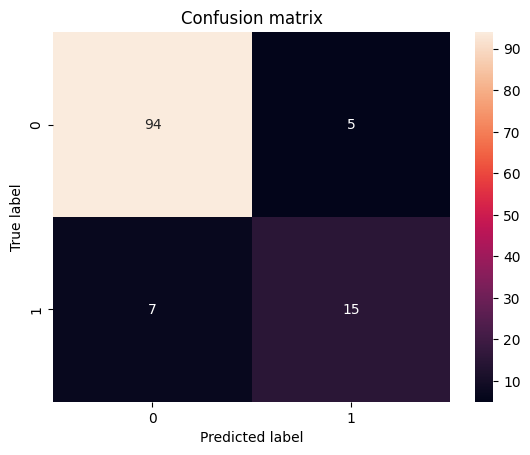

In [ ]:
# Draw confusion matrix for XGBoost model
cm = confusion_matrix(y_test, Y_pred_2)
# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')

# Customize the plot labels and title
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#**Handling imbalance**


In [ ]:
df_oversampling = df_final.copy()

In [ ]:
X = df_oversampling.drop('outcome', axis=1)
y = df_oversampling['outcome']

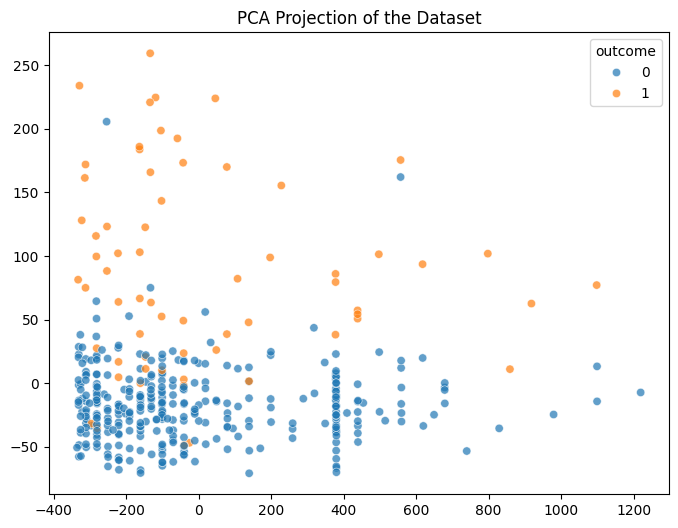

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X là tập dữ liệu (không bao gồm nhãn)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, alpha=0.7)
plt.title("PCA Projection of the Dataset")
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
# Use SMOTE Borderline to solve imbalance between classes
smote_border = BorderlineSMOTE(kind = "borderline-1", random_state=42)
X_train_smote_border, y_train_smote_border = smote_border.fit_resample(X_train,y_train)

In [ ]:
model_3 = RandomForestClassifier(n_jobs= -1, random_state=42)
model_3.fit(X_train_smote_border, y_train_smote_border)
Y_prob_3 = model_3.predict_proba(X_test)[:,1]
threshold = 0.5
Y_pred_3 = (Y_prob_3 >= threshold).astype(int)
print(classification_report(y_test, Y_pred_3, target_names=['Normal', 'Diabetes']))

              precision    recall  f1-score   support

      Normal       0.97      0.93      0.95        99
    Diabetes       0.73      0.86      0.79        22

    accuracy                           0.92       121
   macro avg       0.85      0.90      0.87       121
weighted avg       0.93      0.92      0.92       121



Text(50.722222222222214, 0.5, 'True label')

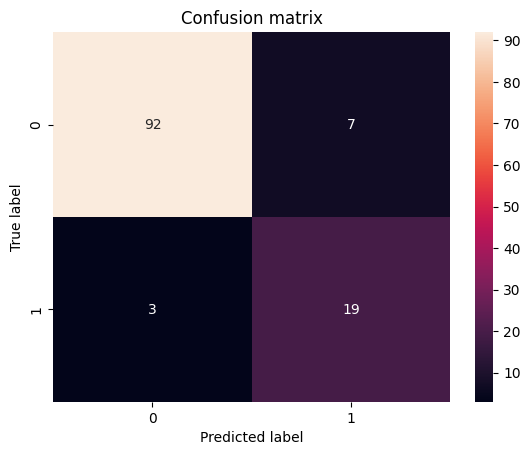

In [ ]:
# Draw confusion matrix for Random Forest model
cm = confusion_matrix(y_test, Y_pred_3)
# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')

# Customize the plot labels and title
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
# Using XGBoost
model_4 = XGBClassifier()
model_4.fit(X_train_smote_border, y_train_smote_border)
Y_prob_4 = model_4.predict_proba(X_test)[:,1]
threshold = 0.4
Y_pred_4 = (Y_prob_4 >= threshold).astype(int)
print(classification_report(y_test, Y_pred_4, target_names=['Normal', 'Diabetes']))

              precision    recall  f1-score   support

      Normal       0.96      0.94      0.95        99
    Diabetes       0.75      0.82      0.78        22

    accuracy                           0.92       121
   macro avg       0.85      0.88      0.87       121
weighted avg       0.92      0.92      0.92       121



Text(50.722222222222214, 0.5, 'True label')

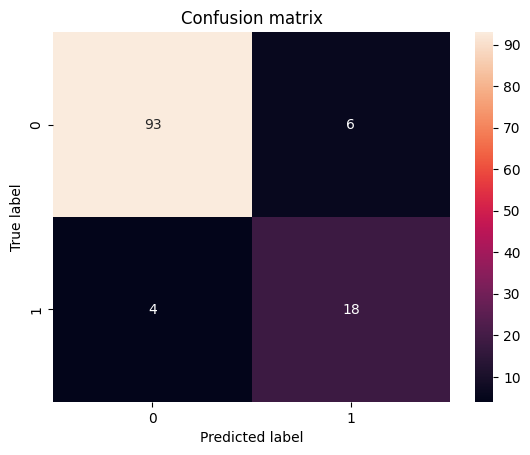

In [ ]:
# Draw confusion matrix for XGBoost model
cm = confusion_matrix(y_test, Y_pred_4)
# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')

# Customize the plot labels and title
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#**Feature Analysis**#

In [ ]:
! pip install shap

In [ ]:
import shap

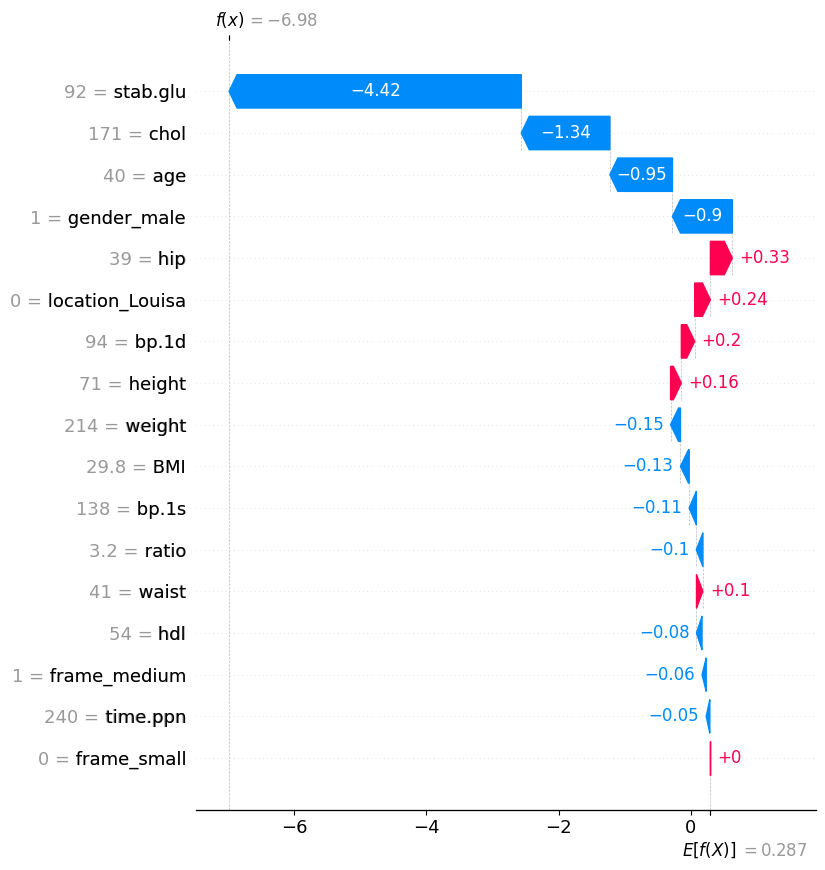

In [ ]:
explainer = shap.Explainer(model_4, X_train_smote_border)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0], max_display=20)

In [ ]:
X_test.head()

,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,waist,hip,time.ppn,BMI,location_Louisa,gender_male,frame_medium,frame_small
70,171.0,92,54.0,3.2,40,71.0,214.0,138.0,94.0,41.0,39.0,240.0,29.8,0,1,1,0
281,293.0,115,54.0,5.4,50,71.0,170.0,131.0,75.0,34.0,39.0,120.0,23.7,0,1,1,0
283,198.0,92,62.0,3.2,60,70.0,163.0,126.0,78.0,36.0,40.0,795.0,23.4,1,1,1,0
33,182.0,85,37.0,4.9,61,69.0,174.0,176.0,86.0,49.0,43.0,330.0,25.7,0,0,1,0
42,225.0,83,42.0,5.4,36,67.0,192.0,149.0,89.0,40.0,42.0,30.0,30.1,0,1,0,0


In [ ]:
y_test.head()

,outcome
70,0
281,0
283,0
33,0
42,0


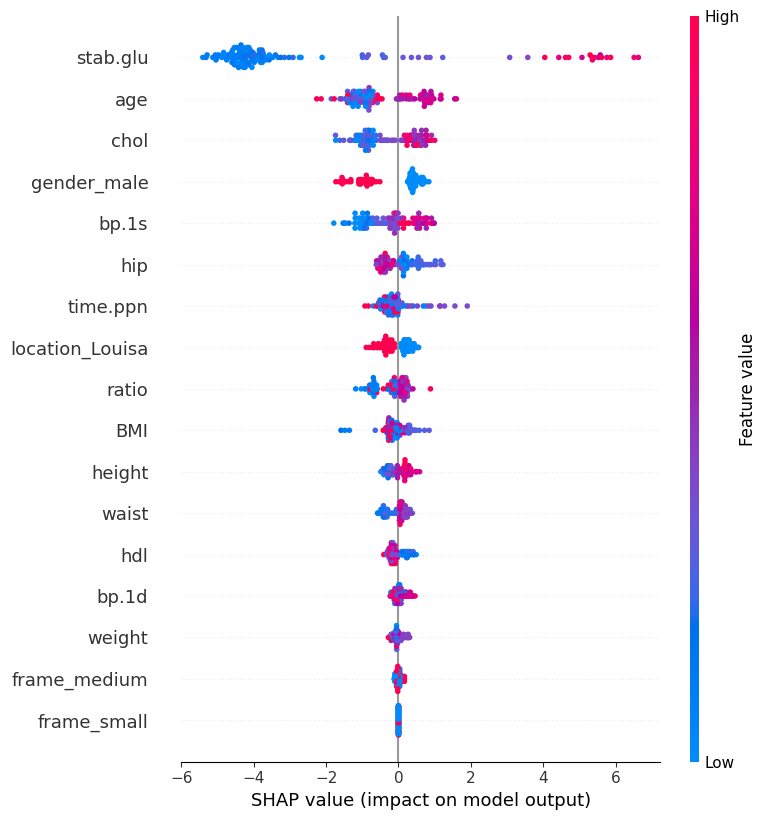

In [ ]:
shap.summary_plot(shap_values, max_display=20)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0:200])

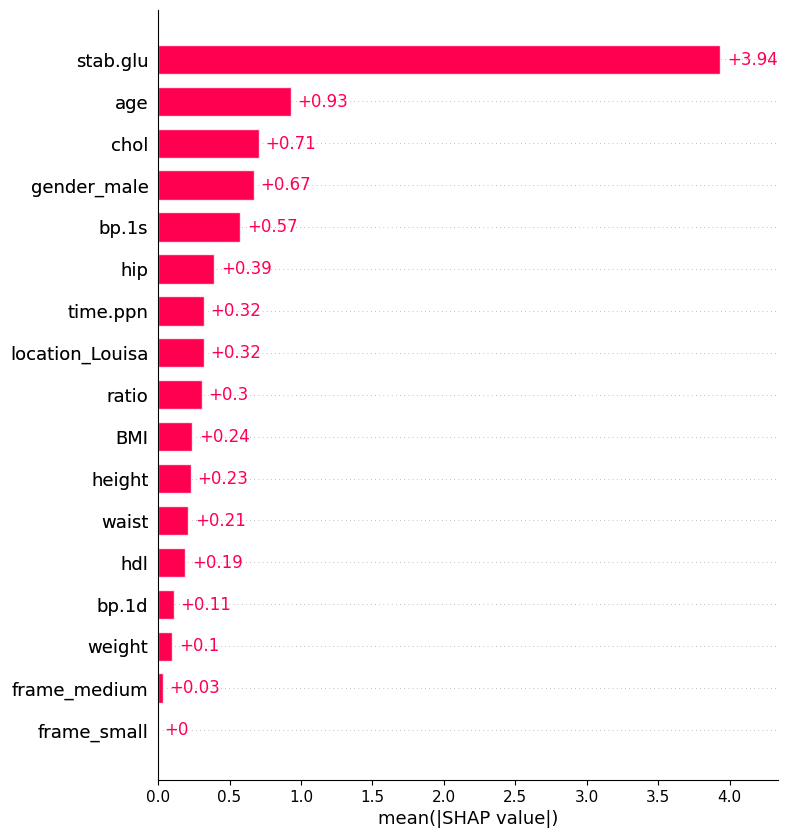

In [ ]:
shap.plots.bar(shap_values, max_display=20)